In [12]:
### Setup Environment ###
import numpy as np
import pandas as pd
import plotly_express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.stats import chi2_contingency
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from itertools import combinations

np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.4f}'.format})
pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.max_rows', None)

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectKBest, SelectFromModel, SequentialFeatureSelector
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('matchups_15.csv')
df = df[df['round'] == 'Second Round']
print(df.shape)
df.head()

(240, 79)


,year,region,round,high_bracket_seed,high_bracket_team,low_bracket_seed,low_bracket_team,win,wab,kenpom_adjem,...,D_D,D_F,F_S,F_A,F_B,F_C,F_D,F_F,Unnamed: 77,Unnamed: 78
1,2009,Midwest,Second Round,1,2009 Louisville,9,2009 Siena,1,7.7992,13.6939,...,0,0,0,0,0,0,0,0,NaN,NaN
7,2009,Midwest,Second Round,10,2009 USC,2,2009 Michigan St.,0,-4.9198,-5.1242,...,0,0,0,0,0,0,0,0,NaN,NaN
9,2009,Midwest,Second Round,12,2009 Arizona,13,2009 Cleveland St.,1,1.9753,4.3091,...,0,0,0,0,0,0,0,0,NaN,NaN
18,2009,West,Second Round,1,2009 Connecticut,9,2009 Texas A&M,1,6.8658,13.6685,...,0,0,0,0,0,0,0,0,NaN,NaN
21,2009,West,Second Round,6,2009 Marquette,3,2009 Missouri,0,-2.6754,-2.5016,...,0,0,0,0,0,0,0,0,NaN,NaN


In [13]:
df['win'].value_counts(normalize=True)

0   0.5167
1   0.4833
Name: win, dtype: float64

In [14]:
df.columns

Index(['year', 'region', 'round', 'high_bracket_seed', 'high_bracket_team',
       'low_bracket_seed', 'low_bracket_team', 'win', 'wab', 'kenpom_adjem',
       'kenpom_adjoe', 'kenpom_adjde', 'barthag', 'barthag_oe', 'barthag_de',
       'off_eff', 'def_eff', 'efg%', 'ftr', 'tor', 'orb%', 'efgd%', 'ftrd',
       'tord', 'drb%', '2p%', '3p%', 'blked%', 'ast%', '3pr', 'ft%', '2p%d',
       '3p%d', 'blk%', 'ast%d', '3prd', 'ft%d', 'height', 'size', 'experience',
       'bench', 'S_S', 'S_A', 'S_B', 'S_C', 'S_D', 'S_F', 'A_S', 'A_A', 'A_B',
       'A_C', 'A_D', 'A_F', 'B_S', 'B_A', 'B_B', 'B_C', 'B_D', 'B_F', 'C_S',
       'C_A', 'C_B', 'C_C', 'C_D', 'C_F', 'D_S', 'D_A', 'D_B', 'D_C', 'D_D',
       'D_F', 'F_S', 'F_A', 'F_B', 'F_C', 'F_D', 'F_F', 'Unnamed: 77',
       'Unnamed: 78'],
      dtype='object')

In [15]:
eda_df = df[[
    'win', 
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench', 
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

In [16]:
# Split dataset into a train and test set
X = eda_df.iloc[:,1:]
Y = eda_df['win']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

print(train_df.shape)
print(test_df.shape)

(168, 70)
(72, 70)


In [17]:
train_cat = train_df[[
    'win',
    'S_S', 
    'S_A', 
    'S_B', 
    'S_C', 
    'S_D',
    'S_F', 
    'A_S', 
    'A_A', 
    'A_B', 
    'A_C', 
    'A_D', 
    'A_F', 
    'B_S', 
    'B_A', 
    'B_B',
    'B_C', 
    'B_D', 
    'B_F', 
    'C_S', 
    'C_A', 
    'C_B', 
    'C_C', 
    'C_D', 
    'C_F', 
    'D_S',
    'D_A', 
    'D_B', 
    'D_C', 
    'D_D', 
    'D_F', 
    'F_S', 
    'F_A', 
    'F_B', 
    'F_C', 
    'F_D',
    'F_F']]

train_num = train_df[[
    'win', 
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'ftr', 
    'tor', 
    'orb%', 
    'efgd%', 
    'ftrd',
    'tord', 
    'drb%', 
    '2p%', 
    '3p%', 
    'blked%', 
    'ast%', 
    '3pr', 
    'ft%', 
    '2p%d',
    '3p%d', 
    'blk%', 
    'ast%d', 
    '3prd', 
    'ft%d', 
    'height', 
    'size', 
    'experience',
    'bench']]

### I. Categorical Variables

In [18]:
s_tiers = train_cat[[
 'S_S',
 'S_A',
 'S_B',
 'S_C',
 'S_D',
 'S_F']]
print(s_tiers.value_counts())
a_tiers = train_cat[[
 'A_S',
 'A_A',
 'A_B',
 'A_C',
 'A_D',
 'A_F']]
print(a_tiers.value_counts())
b_tiers = train_cat[[
 'B_S',
 'B_A',
 'B_B',
 'B_C',
 'B_D',
 'B_F']]
print(b_tiers.value_counts())
c_tiers = train_cat[[
 'C_S',
 'C_A',
 'C_B',
 'C_C',
 'C_D',
 'C_F']]
print(c_tiers.value_counts())
d_tiers = train_cat[[
 'D_S',
 'D_A',
 'D_B',
 'D_C',
 'D_D',
 'D_F']]
print(d_tiers.value_counts())
f_tiers = train_cat[[
 'F_S',
 'F_A',
 'F_B',
 'F_C',
 'F_D',
 'F_F']]
print(f_tiers.value_counts())

S_S  S_A  S_B  S_C  S_D  S_F
0    0    0    0    0    0      132
               1    0    0       14
          1    0    0    0       14
          0    0    1    0        4
     1    0    0    0    0        4
dtype: int64
A_S  A_A  A_B  A_C  A_D  A_F
0    0    0    0    0    0      139
     1    0    0    0    0       11
     0    1    0    0    0        8
          0    1    0    0        6
1    0    0    0    0    0        4
dtype: int64
B_S  B_A  B_B  B_C  B_D  B_F
0    0    0    0    0    0      128
     1    0    0    0    0       20
     0    1    0    0    0        6
1    0    0    0    0    0        5
0    0    0    1    0    0        4
               0    0    1        3
                    1    0        2
dtype: int64
C_S  C_A  C_B  C_C  C_D  C_F
0    0    0    0    0    0      115
     1    0    0    0    0       18
     0    1    0    0    0       15
1    0    0    0    0    0        8
0    0    0    0    1    0        6
                    0    1        3
               1 

In [21]:
# Remove all tier matchups that happened five or less times and view win percentage of the the remaining tiers
all_tiers = train_cat[[
 'win',
 'S_B',
 'S_C',
 'A_B',
 'A_C',
 'B_A',
 'B_S',
 'C_A',
 'C_B',
 'C_S']]

In [22]:
all_tiers.groupby(by=['win', 'S_B']).size()

win  S_B
0    0      83
     1       2
1    0      71
     1      12
dtype: int64

In [23]:
all_tiers.groupby(by=['win', 'S_C']).size()

win  S_C
0    0      85
1    0      69
     1      14
dtype: int64

In [24]:
all_tiers.groupby(by=['win', 'A_B']).size()

win  A_B
0    0      81
     1       4
1    0      79
     1       4
dtype: int64

In [25]:
all_tiers.groupby(by=['win', 'A_C']).size()

win  A_C
0    0      83
     1       2
1    0      79
     1       4
dtype: int64

In [26]:
all_tiers.groupby(by=['win', 'B_A']).size()

win  B_A
0    0      72
     1      13
1    0      76
     1       7
dtype: int64

In [27]:
all_tiers.groupby(by=['win', 'B_S']).size()

win  B_S
0    0      81
     1       4
1    0      82
     1       1
dtype: int64

In [28]:
all_tiers.groupby(by=['win', 'C_S']).size()

win  C_S
0    0      79
     1       6
1    0      81
     1       2
dtype: int64

In [29]:
all_tiers.groupby(by=['win', 'C_A']).size()

win  C_A
0    0      71
     1      14
1    0      79
     1       4
dtype: int64

In [30]:
all_tiers.groupby(by=['win', 'C_B']).size()

win  C_B
0    0      75
     1      10
1    0      78
     1       5
dtype: int64

### II. Numerical Tests

/var/folders/nd/7h3lcr8d2cjbxfmfqghczqz40000gn/T/ipykernel_86493/3841579261.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])


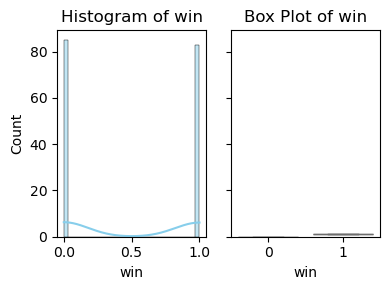

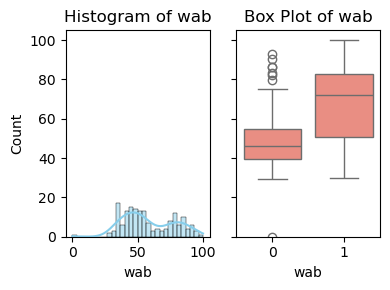

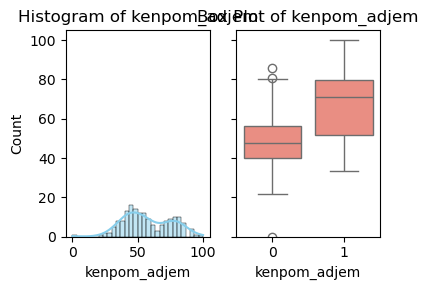

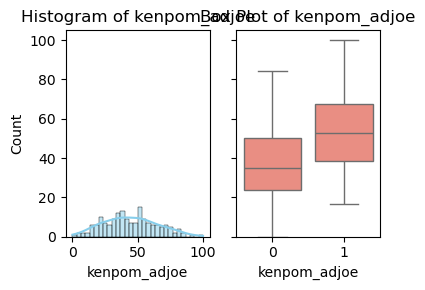

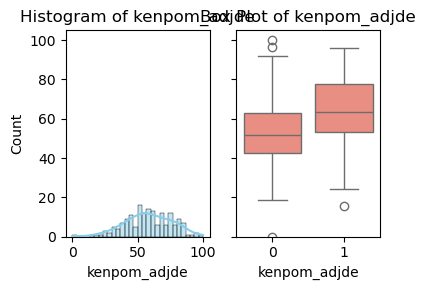

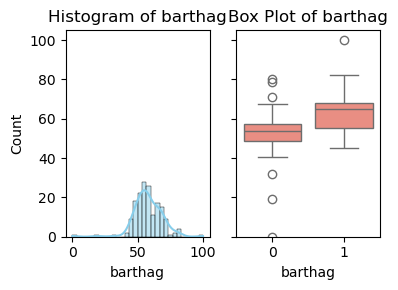

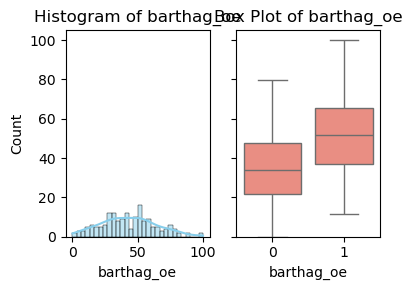

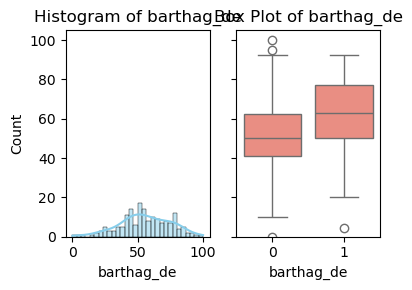

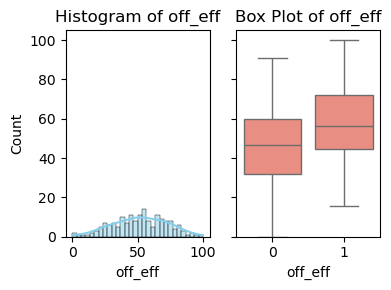

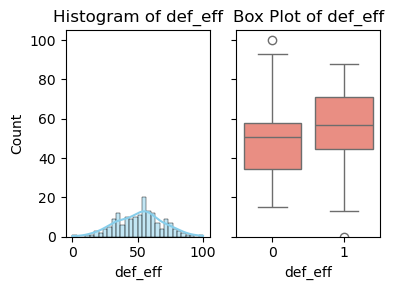

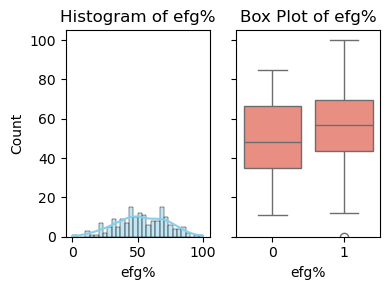

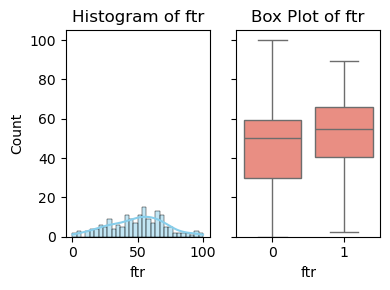

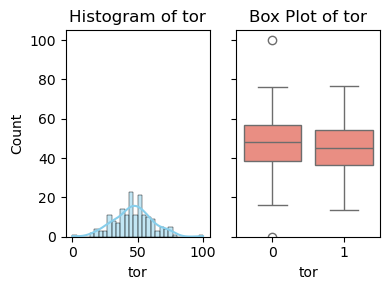

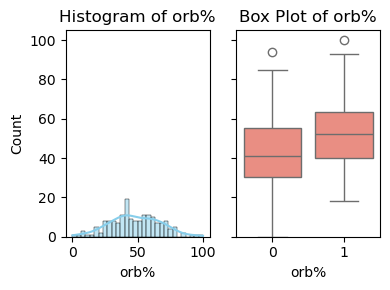

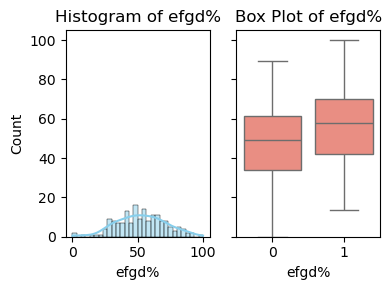

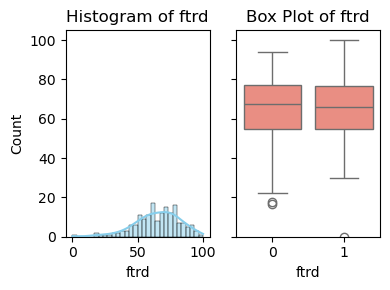

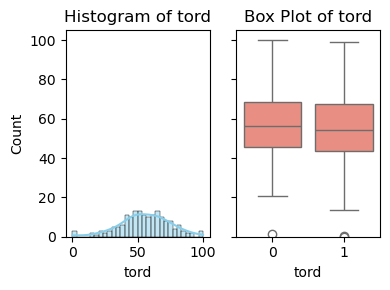

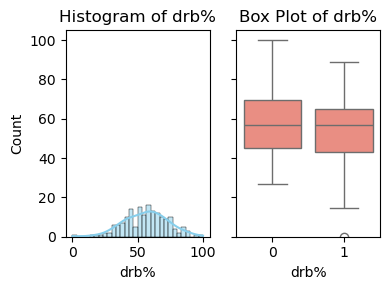

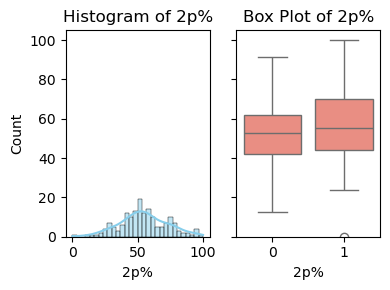

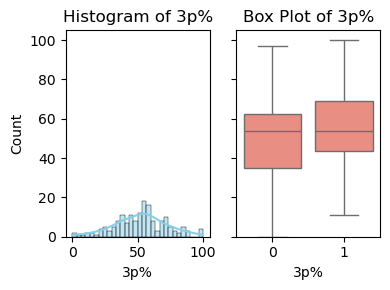

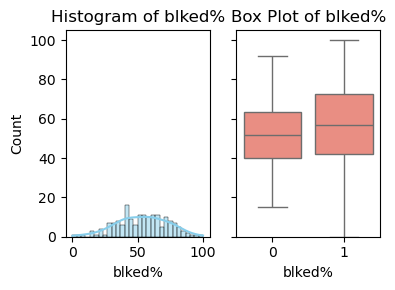

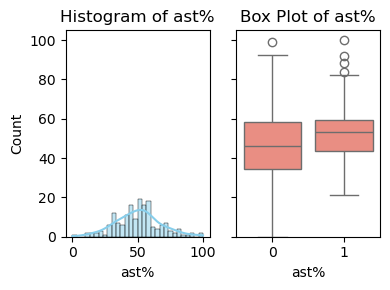

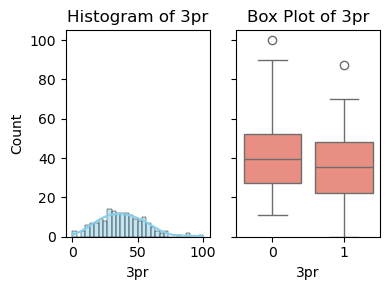

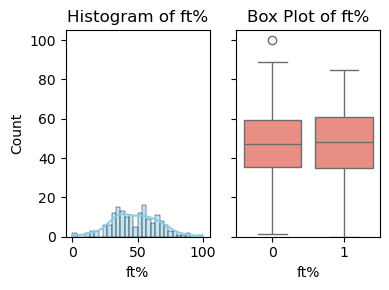

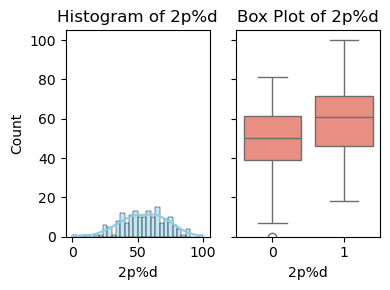

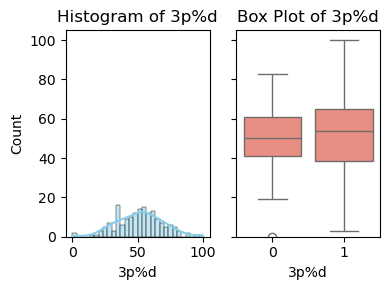

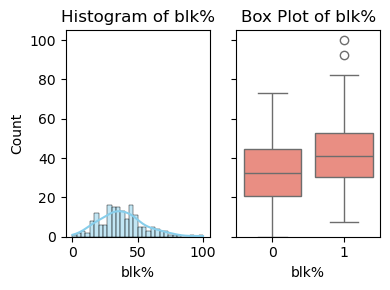

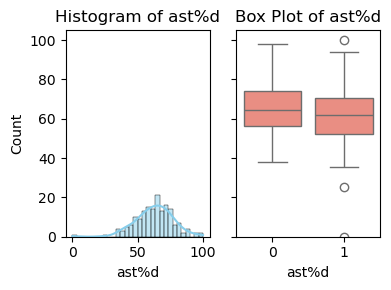

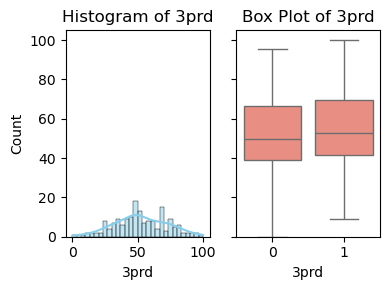

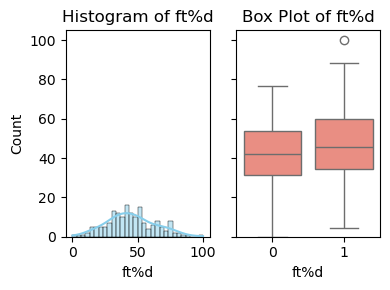

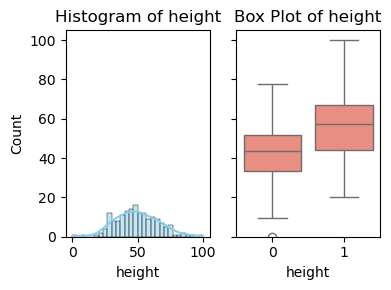

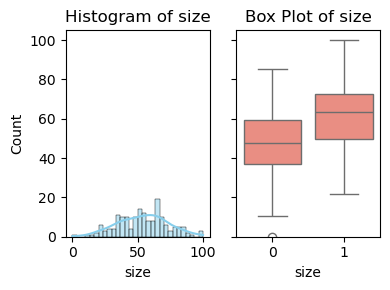

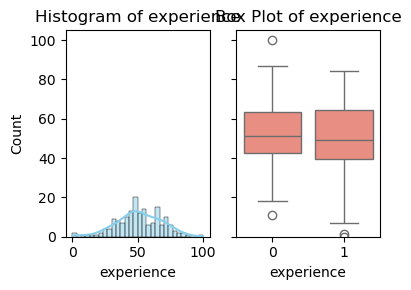

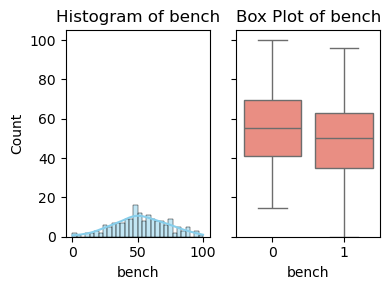

In [31]:
scaler = MinMaxScaler(feature_range=(0,100))
box_df = train_num
numeric_columns = train_num.drop(columns=['win']).columns
box_df[numeric_columns] = scaler.fit_transform(box_df[numeric_columns])

for column in box_df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(4, 3), sharey=True)

    # Histogram on the left
    sns.histplot(box_df[column], kde=True, ax=axes[0], color='skyblue', bins=30)
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)

    # Box plot on the right
    sns.boxplot(x='win', y=column, data=box_df, ax=axes[1], color='salmon')
    axes[1].set_title(f'Box Plot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

In [32]:
corr_matrix = train_num.corr()
correlation_with_target = round(abs(corr_matrix['win'])*100,2)
correlation_with_target = correlation_with_target[correlation_with_target >= 10]
print(correlation_with_target)

win            100.0000
wab             46.7600
kenpom_adjem    51.6100
kenpom_adjoe    41.1200
kenpom_adjde    29.8600
barthag         45.7700
barthag_oe      42.2200
barthag_de      30.2300
off_eff         29.5900
def_eff         21.1400
efg%            17.0700
ftr             10.1800
orb%            25.3000
efgd%           24.5400
2p%             12.8000
3p%             14.7200
blked%          12.2200
ast%            14.9100
3pr             13.5900
2p%d            28.0900
blk%            29.8100
ast%d           12.3500
3prd            10.1100
ft%d            10.3800
height          41.9400
size            35.7300
bench           14.5100
Name: win, dtype: float64


In [33]:
X = train_num.drop('win', axis=1)
y = train_num['win']

# ANOVA
f_values, p_values = f_classif(X, y)
# Mutual Information
mi = mutual_info_regression(X, y)

column_names = np.array(X.columns)
stats_df = pd.DataFrame({
    'feature': column_names,
    'f_values': f_values,
    'p_values': p_values,
    'mutual_info': mi
})
stats_df

,feature,f_values,p_values,mutual_info
0,wab,46.4617,0.0000,0.1482
1,kenpom_adjem,60.2713,0.0000,0.1084
2,kenpom_adjoe,33.7723,0.0000,0.0968
3,kenpom_adjde,16.2499,0.0001,0.0576
4,barthag,43.9927,0.0000,0.1018
5,barthag_oe,36.0177,0.0000,0.0525
6,barthag_de,16.6964,0.0001,0.0794
7,off_eff,15.9271,0.0001,0.0000
8,def_eff,7.7625,0.0060,0.0537
9,efg%,4.9828,0.0269,0.0118


In [34]:
stats_df[stats_df['mutual_info'] > .05]

,feature,f_values,p_values,mutual_info
0,wab,46.4617,0.0000,0.1482
1,kenpom_adjem,60.2713,0.0000,0.1084
2,kenpom_adjoe,33.7723,0.0000,0.0968
3,kenpom_adjde,16.2499,0.0001,0.0576
4,barthag,43.9927,0.0000,0.1018
5,barthag_oe,36.0177,0.0000,0.0525
6,barthag_de,16.6964,0.0001,0.0794
8,def_eff,7.7625,0.0060,0.0537
20,ast%,3.7762,0.0537,0.0514
21,3pr,3.1243,0.0790,0.0519


In [35]:
stats_df[stats_df['p_values'] < .05]

,feature,f_values,p_values,mutual_info
0,wab,46.4617,0.0000,0.1482
1,kenpom_adjem,60.2713,0.0000,0.1084
2,kenpom_adjoe,33.7723,0.0000,0.0968
3,kenpom_adjde,16.2499,0.0001,0.0576
4,barthag,43.9927,0.0000,0.1018
5,barthag_oe,36.0177,0.0000,0.0525
6,barthag_de,16.6964,0.0001,0.0794
7,off_eff,15.9271,0.0001,0.0000
8,def_eff,7.7625,0.0060,0.0537
9,efg%,4.9828,0.0269,0.0118


In [36]:
stats_df[stats_df['f_values'] > 5]

,feature,f_values,p_values,mutual_info
0,wab,46.4617,0.0000,0.1482
1,kenpom_adjem,60.2713,0.0000,0.1084
2,kenpom_adjoe,33.7723,0.0000,0.0968
3,kenpom_adjde,16.2499,0.0001,0.0576
4,barthag,43.9927,0.0000,0.1018
5,barthag_oe,36.0177,0.0000,0.0525
6,barthag_de,16.6964,0.0001,0.0794
7,off_eff,15.9271,0.0001,0.0000
8,def_eff,7.7625,0.0060,0.0537
12,orb%,11.3518,0.0009,0.0349


In [37]:
# Remove any numerical variables who hit 0 criteria
# Remove any categorical variables who's win percentage is less than Round 1 win percentage
train_df = train_df[[
    'win', 
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'orb%', 
    'efgd%', 
    'ast%', 
    '3pr', 
    '2p%d',
    'blk%', 
    '3prd', 
    'height', 
    'size', 
    'S_B',
    'S_C',
    'B_S',
    'C_S']]

test_df = test_df[[
    'win', 
     'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'orb%', 
    'efgd%', 
    'ast%', 
    '3pr', 
    '2p%d',
    'blk%', 
    '3prd', 
    'height', 
    'size', 
    'S_B',
    'S_C',
    'B_S',
    'C_S']]


### III. Wrapper Methods

In [38]:
X_train = train_df.iloc[:,1:]
Y_train = train_df['win']

X_test = test_df.iloc[:,1:]
Y_test = test_df['win']

float64_columns = X_train.select_dtypes(include=['float64']).columns

scaler = StandardScaler()

X_train_scaled = X_train.copy()
X_train_scaled[float64_columns] = scaler.fit_transform(X_train[float64_columns])

X_test_scaled = X_test.copy()
X_test_scaled[float64_columns] = scaler.transform(X_test[float64_columns])

In [39]:
X_train_scaled.head()

,wab,kenpom_adjem,kenpom_adjoe,kenpom_adjde,barthag,barthag_oe,barthag_de,off_eff,def_eff,efg%,...,3pr,2p%d,blk%,3prd,height,size,S_B,S_C,B_S,C_S
122,-0.2950,-1.2585,-0.5836,-1.1307,-1.1742,-0.6885,-1.0800,-0.0800,-0.3324,0.8605,...,-0.5750,0.5978,-0.4721,-0.2026,1.0334,0.7851,0,0,0,0
500,0.5235,1.2479,0.1913,1.4934,2.1069,0.2375,1.4960,-0.2868,0.4475,-0.1470,...,0.9346,0.2058,0.0380,-0.8949,0.7690,1.5885,0,0,0,0
298,0.8269,1.5947,-0.2349,2.3690,2.0648,-0.7143,2.3369,-1.2538,1.6797,-1.0970,...,0.0682,0.6849,0.0981,0.3133,0.3117,0.5883,0,0,0,0
329,1.0133,1.2041,0.1333,1.4902,0.7482,0.2536,0.9663,0.0331,1.1640,-0.2046,...,-1.4282,0.7285,0.6082,1.1278,0.3914,1.3999,0,0,0,0
24,-0.1519,0.0026,-1.2133,1.1694,0.0796,-1.2903,1.2489,-0.9076,1.3091,-0.4637,...,-0.8769,1.6649,-0.0820,2.4039,1.2851,1.2852,0,0,0,0


In [40]:
X_test_scaled.head()

,wab,kenpom_adjem,kenpom_adjoe,kenpom_adjde,barthag,barthag_oe,barthag_de,off_eff,def_eff,efg%,...,3pr,2p%d,blk%,3prd,height,size,S_B,S_C,B_S,C_S
96,1.4203,1.0487,-0.4517,1.8435,0.7535,-0.3790,1.6886,-0.1457,2.1002,-0.9818,...,-1.0082,1.9262,2.0487,1.6708,-1.3248,0.6211,0,1,0,0
29,-1.2220,-1.6921,-2.8186,0.4340,-1.1680,-2.7404,0.5922,-2.9035,-0.1477,-3.5150,...,-1.7826,0.5325,-0.4421,0.6120,-1.5178,-1.0348,0,0,0,1
373,0.5889,1.4952,1.0603,0.9907,1.8810,1.3797,0.7915,0.3285,-0.4692,-1.0394,...,-0.3912,0.5761,0.6683,0.6663,-0.1331,0.5883,0,0,0,0
433,0.0443,0.7679,0.1126,0.9239,0.5408,0.0813,1.0176,0.6555,1.2154,0.8029,...,0.3964,1.4254,1.3585,1.2907,0.4291,-0.3626,0,0,0,0
412,1.8854,1.6330,1.7361,0.5267,0.9029,1.5033,0.4319,1.4790,0.8499,0.3999,...,0.5801,1.1423,0.5182,0.6120,-0.3891,-0.1987,0,1,0,0


In [41]:
sel_ = SelectFromModel(
    LogisticRegression(C=0.5, penalty='l1', solver='liblinear', random_state=10))

sel_.fit(X_train_scaled, Y_train)

SelectFromModel(estimator=LogisticRegression(C=0.5, penalty='l1',
                                             random_state=10,
                                             solver='liblinear'))

In [42]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 23
selected features: 10
features with coefficients shrank to zero: 13


In [43]:
selected_feat

Index(['barthag_oe', 'barthag_de', 'efg%', 'orb%', 'ast%', '2p%d', 'blk%',
       '3prd', 'height', 'size'],
      dtype='object')

In [44]:
# Transform datasets based on selected features
X_train_selected = sel_.transform(X_train_scaled)
X_test_selected = sel_.transform(X_test_scaled)

# Train a Lasso regression model
lasso = Lasso(alpha=0.1, random_state=42)
lasso.fit(X_train_selected, y_train)

# Make predictions
y_train_pred = lasso.predict(X_train_selected)
y_test_pred = lasso.predict(X_test_selected)

# Convert predictions to binary using a threshold
threshold = 0.5
y_train_pred_binary = (y_train_pred >= threshold).astype(int)
y_test_pred_binary = (y_test_pred >= threshold).astype(int)

# Evaluate F1 scores
f1_train = f1_score(y_train, y_train_pred_binary)
f1_test = f1_score(y_test, y_test_pred_binary)

print(f"Lasso Regression F1 Score (Train): {f1_train:.2f}")
print(f"Lasso Regression F1 Score (Test): {f1_test:.2f}")

Lasso Regression F1 Score (Train): 0.75
Lasso Regression F1 Score (Test): 0.70


In [65]:
sfs = SequentialFeatureSelector(
        estimator=RandomForestClassifier(
        n_estimators=8, n_jobs=4, random_state=0),
        n_features_to_select=10,  # the number of features to retain
        direction='backward',  # the direction of the selection procedure
        scoring='roc_auc',  # the metric to evaluate
        cv=2, # the cross-validation fold
        n_jobs=None
)


sfs = sfs.fit(X_train, y_train)

In [66]:
def run_randomForests(X_train, X_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=3)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [67]:
selected_feat= sfs.get_feature_names_out()
selected_feat

array(['barthag_oe', 'barthag_de', 'off_eff', 'efg%', 'efgd%', '3pr',
       '3prd', 'size', 'S_B', 'B_S'], dtype=object)

In [68]:
run_randomForests(X_train[selected_feat],
                  X_test[selected_feat],
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.932388377037562
Test set
Random Forests roc-auc: 0.8041958041958042


In [49]:
run_randomForests(X_train,
                  X_test,
                  y_train, y_test)

Train set
Random Forests roc-auc: 0.9391920623671155
Test set
Random Forests roc-auc: 0.7917637917637917


In [58]:
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values

[0.6177156177156178,
 0.6538461538461537,
 0.47785547785547783,
 0.5466200466200466,
 0.6666666666666667,
 0.6107226107226107,
 0.5979020979020979,
 0.578088578088578,
 0.5675990675990676,
 0.5823620823620823,
 0.5994560994560993,
 0.4153069153069153,
 0.5586635586635587,
 0.4145299145299145,
 0.5870240870240869,
 0.5295260295260295,
 0.5361305361305362,
 0.5726495726495727,
 0.4448329448329448,
 0.4895104895104895,
 0.6386946386946387,
 0.5256410256410257,
 0.5361305361305361]

Text(0, 0.5, 'roc-auc')

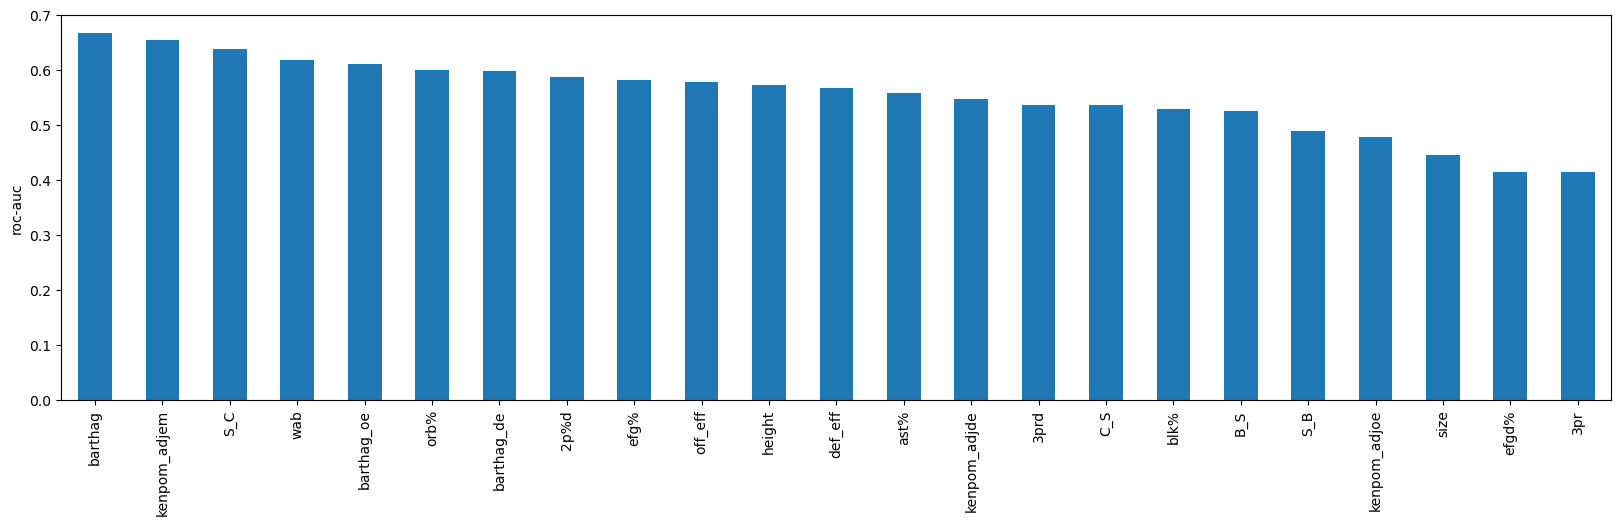

In [59]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 5))
plt.ylabel('roc-auc')

In [60]:
len(roc_values[roc_values > 0.5])

18

In [61]:
len(roc_values[roc_values > 0.6])

5

In [64]:
roc_values[roc_values > 0.5]

wab            0.6177
kenpom_adjem   0.6538
kenpom_adjde   0.5466
barthag        0.6667
barthag_oe     0.6107
barthag_de     0.5979
off_eff        0.5781
def_eff        0.5676
efg%           0.5824
orb%           0.5995
ast%           0.5587
2p%d           0.5870
blk%           0.5295
3prd           0.5361
height         0.5726
S_C            0.6387
B_S            0.5256
C_S            0.5361
dtype: float64

### Exhaustive Feature Selection

In [69]:
X_train_scaled2 = X_train_scaled[[
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'orb%', 
    'ast%', 
    '2p%d',
    'blk%', 
    '3prd', 
    'height', 
    'S_C',
    'B_S',
    'C_S'
]]

X_test_scaled2 = X_test_scaled[[
    'wab', 
    'kenpom_adjem',
    'kenpom_adjoe', 
    'kenpom_adjde', 
    'barthag', 
    'barthag_oe', 
    'barthag_de',
    'off_eff', 
    'def_eff', 
    'efg%',
    'orb%', 
    'ast%', 
    '2p%d',
    'blk%', 
    '3prd', 
    'height', 
    'S_C',
    'B_S',
    'C_S'
]]

In [70]:
# Initialize variables to track the best model
log_reg = LogisticRegression(solver='liblinear')
best_f1 = 0
best_features = []
best_train_f1 = 0

# Iterate over all possible subsets of features
for k in range(1, len(X_train_scaled2.columns) + 1):
    for subset in combinations(X_train_scaled2.columns, k):
        X_train_subset = X_train_scaled2[list(subset)]
        X_test_subset = X_test_scaled2[list(subset)]
        
        # Train the model with the subset of features
        log_reg.fit(X_train_subset, y_train)
        
        # Make predictions on the test set
        y_test_pred = log_reg.predict(X_test_subset)
        test_f1 = f1_score(y_test, y_test_pred)
        
        # Make predictions on the training set
        y_train_pred = log_reg.predict(X_train_subset)
        train_f1 = f1_score(y_train, y_train_pred)
        
        # Track the best subset based on test F1 score
        if test_f1 > best_f1:
            best_f1 = test_f1
            best_features = subset
            best_train_f1 = train_f1

# Output the best feature subset and the F1 scores
print(f"Best Feature Subset: {best_features}")
print(f"Best Test F1 Score: {best_f1:.4f}")
print(f"Training F1 Score of Best Model: {best_train_f1:.4f}")

Best Feature Subset: ('kenpom_adjde', 'barthag_de', 'def_eff', 'efg%')
Best Test F1 Score: 0.8182
Training F1 Score of Best Model: 0.6627


### V. XG Boost

In [79]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss, accuracy_score

xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Set up hyperparameter grid
param_grid = {
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [200, 300, 400, 500, 1000],
    'subsample': [0.1, 0.2, 0.3, 0.4],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.4],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_log_loss', cv=5, verbose=1, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train_scaled2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
Best Hyperparameters: {'colsample_bytree': 0.2, 'gamma': 0.2, 'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.3}


In [80]:
# Retrain the model with the best parameters
best_xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    **best_params
)

best_xgb_model.fit(X_train_scaled2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.2, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [81]:
# Predict probabilities
y_pred_proba = best_xgb_model.predict_proba(X_test_scaled2)[:, 1]

# Calculate Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss on test set: {logloss}")

Log Loss on test set: 0.5635820329403012


In [82]:
# Predictions
y_train_pred = best_xgb_model.predict(X_train_scaled2)
y_test_pred = best_xgb_model.predict(X_test_scaled2)

# Calculate accuracy scores
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy Score on Training Data: {acc_train:.2f}")
print(f"Accuracy Score on Test Data: {acc_test:.2f}")

Accuracy Score on Training Data: 0.85
Accuracy Score on Test Data: 0.76
